# Alexine Studios

In [1]:
#@title Dataset
!wget -qq https://cdn.iiith.talentsprint.com/CDSE_experiments_data/rainfall_in_india_1901-2015.csv

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv("/content/rainfall_in_india_1901-2015.csv")
df

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,LAKSHADWEEP,2011,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9
4112,LAKSHADWEEP,2012,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8
4113,LAKSHADWEEP,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7
4114,LAKSHADWEEP,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3


## Summary of the dataset

In [48]:
print("NO. OF ROWS:", df.shape[0])
print("NO. OF COLUMNS:", df.shape[1])
print("COLUMNS:", df.columns.tolist())
print("MISSING VALUES:", df.isnull().values.sum())

NO. OF ROWS: 4116
NO. OF COLUMNS: 14
COLUMNS: ['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
MISSING VALUES: 70


## Inspecting the dataset

In [49]:
df.iloc[:,2:]

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6
1,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5
2,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0
3,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1
4,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7
...,...,...,...,...,...,...,...,...,...,...,...,...
4111,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9
4112,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8
4113,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7
4114,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3


In [50]:
df['Annual_Rainfall'] = df.iloc[:,2:].sum(axis=1)

In [51]:
df

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Annual_Rainfall
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,LAKSHADWEEP,2011,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9,1533.7
4112,LAKSHADWEEP,2012,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8,1405.5
4113,LAKSHADWEEP,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3
4114,LAKSHADWEEP,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0


In [52]:
total = df.isna().sum().sort_values(ascending = False)
total

NOV                11
DEC                10
OCT                 7
JUL                 7
SEP                 6
MAR                 6
JUN                 5
AUG                 4
APR                 4
JAN                 4
MAY                 3
FEB                 3
Annual_Rainfall     0
YEAR                0
SUBDIVISION         0
dtype: int64

In [53]:
percentages = df.isna().sum() / df.isna().count()
percentages

SUBDIVISION        0.000000
YEAR               0.000000
JAN                0.000972
FEB                0.000729
MAR                0.001458
APR                0.000972
MAY                0.000729
JUN                0.001215
JUL                0.001701
AUG                0.000972
SEP                0.001458
OCT                0.001701
NOV                0.002672
DEC                0.002430
Annual_Rainfall    0.000000
dtype: float64

In [54]:
missing_data = pd.concat([total, percentages], axis=1,keys=['Total','Percent'])
missing_data

,Total,Percent
NOV,11,0.002672
DEC,10,0.002430
OCT,7,0.001701
JUL,7,0.001701
SEP,6,0.001458
MAR,6,0.001458
JUN,5,0.001215
AUG,4,0.000972
APR,4,0.000972
JAN,4,0.000972


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


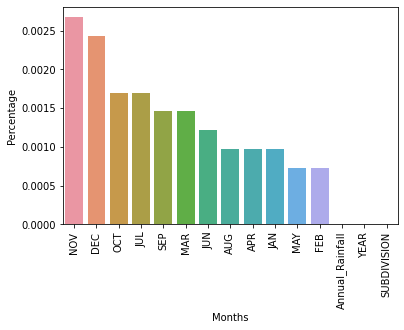

In [55]:
plt.xticks(rotation='90')
sns.barplot(missing_data.index, missing_data['Percent'])
plt.xlabel("Months")
plt.ylabel("Percentage")
plt.show()

In [56]:
df.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Annual_Rainfall
count,4116.000000,4112.000000,4113.000000,4110.000000,4112.000000,4113.000000,4111.000000,4109.000000,4112.000000,4110.000000,4109.000000,4105.000000,4106.000000,4116.000000
mean,1958.218659,18.957320,21.805325,27.359197,43.127432,85.745417,230.234444,347.214334,290.263497,197.361922,95.507009,39.866163,18.870580,1414.379252
std,33.140898,33.585371,35.909488,46.959424,67.831168,123.234904,234.710758,269.539667,188.770477,135.408345,99.519134,68.685410,42.369611,907.200258
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,46.600000
25%,1930.000000,0.600000,0.600000,1.000000,3.000000,8.600000,70.350000,175.600000,155.975000,100.525000,14.600000,0.700000,0.100000,804.375000
50%,1958.000000,6.000000,6.700000,7.800000,15.700000,36.600000,138.700000,284.800000,259.400000,173.900000,65.200000,9.500000,3.000000,1123.100000
75%,1987.000000,22.200000,26.800000,31.300000,49.950000,97.200000,305.150000,418.400000,377.800000,265.800000,148.400000,46.100000,17.500000,1651.025000
max,2015.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SUBDIVISION      4116 non-null   object 
 1   YEAR             4116 non-null   int64  
 2   JAN              4112 non-null   float64
 3   FEB              4113 non-null   float64
 4   MAR              4110 non-null   float64
 5   APR              4112 non-null   float64
 6   MAY              4113 non-null   float64
 7   JUN              4111 non-null   float64
 8   JUL              4109 non-null   float64
 9   AUG              4112 non-null   float64
 10  SEP              4110 non-null   float64
 11  OCT              4109 non-null   float64
 12  NOV              4105 non-null   float64
 13  DEC              4106 non-null   float64
 14  Annual_Rainfall  4116 non-null   float64
dtypes: float64(13), int64(1), object(1)
memory usage: 482.5+ KB


Replacing the Missing Data

In [58]:
df['JAN'].mean()

18.957320038910485

In [59]:
df.fillna(df.mean(), inplace=True)

In [60]:
df.isna().sum()

SUBDIVISION        0
YEAR               0
JAN                0
FEB                0
MAR                0
APR                0
MAY                0
JUN                0
JUL                0
AUG                0
SEP                0
OCT                0
NOV                0
DEC                0
Annual_Rainfall    0
dtype: int64

## Annual Rainfall in India

In [80]:
temp = pd.concat([df.groupby("YEAR").max()["Annual_Rainfall"], df.groupby("YEAR").min()["Annual_Rainfall"]], axis=1, keys=["MAX","MIN"])
temp.head()

,MAX,MIN
YEAR,,
1901,3373.2,158.8
1902,3699.2,195.5
1903,3317.4,307.2
1904,3141.1,167.9
1905,3005.0,114.4


In [86]:
## P1 = (1961, 6331.1)
## P2 = (,2793.2)
## plt.scatter([P1,P2], color='r')
temp.MAX.max(), temp.MIN.min()

(6331.1, 2793.2)

In [ ]:
df.groupby("YEAR").max()["Annual_Rainfall"]

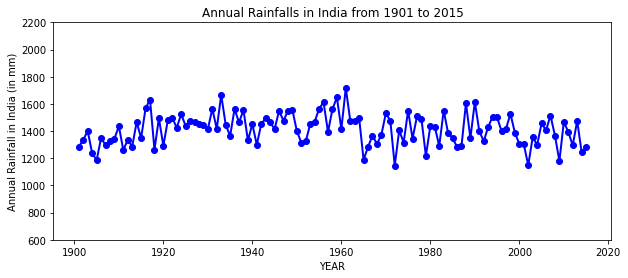

In [74]:
ax = df.groupby("YEAR").mean()["Annual_Rainfall"].plot(ylim=(600,2200),color='b',marker='o',linewidth=2,figsize=(10,4))
plt.xlabel("YEAR")
plt.ylabel("Annual Rainfall in India (in mm)")
plt.title("Annual Rainfalls in India from 1901 to 2015")
plt.show()

In [88]:
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Annual_Rainfall
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7


In [101]:
df.iloc[:,12:14]

,NOV,DEC
0,558.2,33.6
1,359.0,160.5
2,284.4,225.0
3,308.7,40.1
4,25.4,344.7
...,...,...
4111,184.3,14.9
4112,12.4,8.8
4113,78.1,26.7
4114,59.0,62.3


In [102]:
## JAN_FEB
## JUL_AUG
## NOV_DEC

df['JAN_FEB'] = df.iloc[:,2:4].sum(axis=1)
df['JUL_AUG'] = df.iloc[:,8:10].sum(axis=1)
df['NOV_DEC'] = df.iloc[:,12:14].sum(axis=1)

In [103]:
df

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Annual_Rainfall,JAN_FEB,JUL_AUG,NOV_DEC
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,846.2,591.8
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,982.6,519.5
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,1055.1,509.4
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,662.1,348.8
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,699.2,370.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,LAKSHADWEEP,2011,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9,1533.7,7.9,604.2,199.2
4112,LAKSHADWEEP,2012,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8,1405.5,19.3,612.7,21.2
4113,LAKSHADWEEP,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,450.8,104.8
4114,LAKSHADWEEP,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,582.2,121.3


In [104]:
df.columns

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'Annual_Rainfall', 'JAN_FEB',
       'JUL_AUG', 'NOV_DEC'],
      dtype='object')

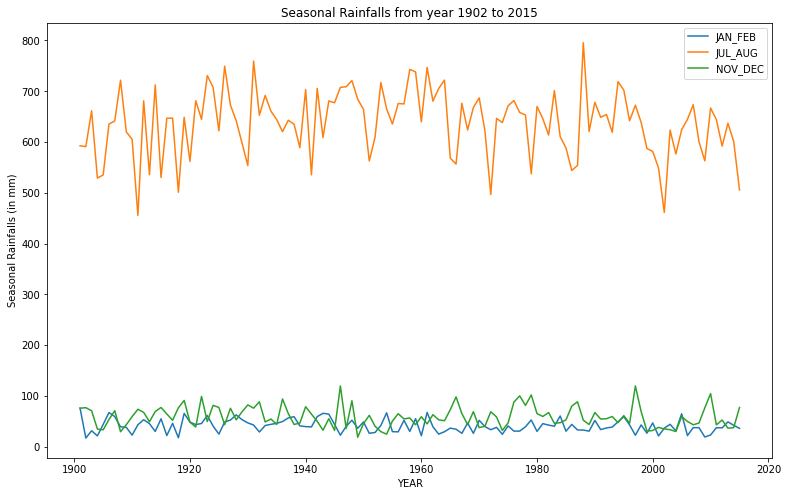

In [108]:
df[['YEAR','JAN_FEB','JUL_AUG', 'NOV_DEC']].groupby("YEAR").mean().plot(figsize=(13,8))
plt.ylabel("Seasonal Rainfalls (in mm)")
plt.title("Seasonal Rainfalls from year 1902 to 2015")
plt.show()

## Season-wise Rainfall in INDIA

In [109]:
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Annual_Rainfall,JAN_FEB,JUL_AUG,NOV_DEC
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,846.2,591.8
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,982.6,519.5
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,1055.1,509.4
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,662.1,348.8
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,699.2,370.1


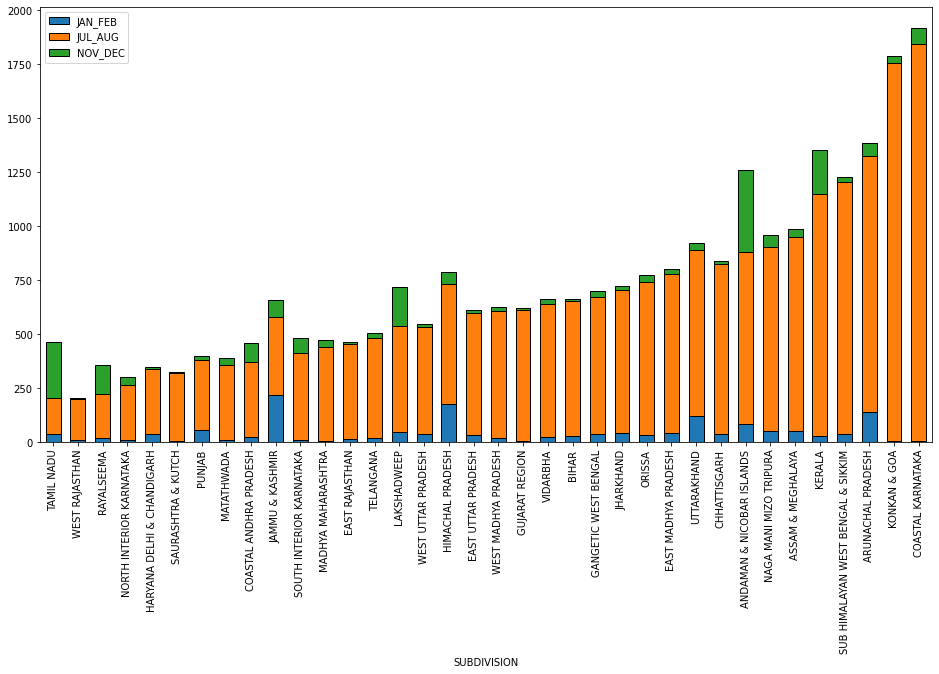

In [122]:
df[['SUBDIVISION','JAN_FEB','JUL_AUG', 'NOV_DEC']].groupby('SUBDIVISION').mean().sort_values('JUL_AUG').plot.bar(width=0.6,edgecolor='k',align='center',stacked=True,figsize=(16,8));

## BOX-PLOT of Annual Rainfall

In [123]:
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,Annual_Rainfall,JAN_FEB,JUL_AUG,NOV_DEC
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,846.2,591.8
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,982.6,519.5
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,1055.1,509.4
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,662.1,348.8
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,699.2,370.1


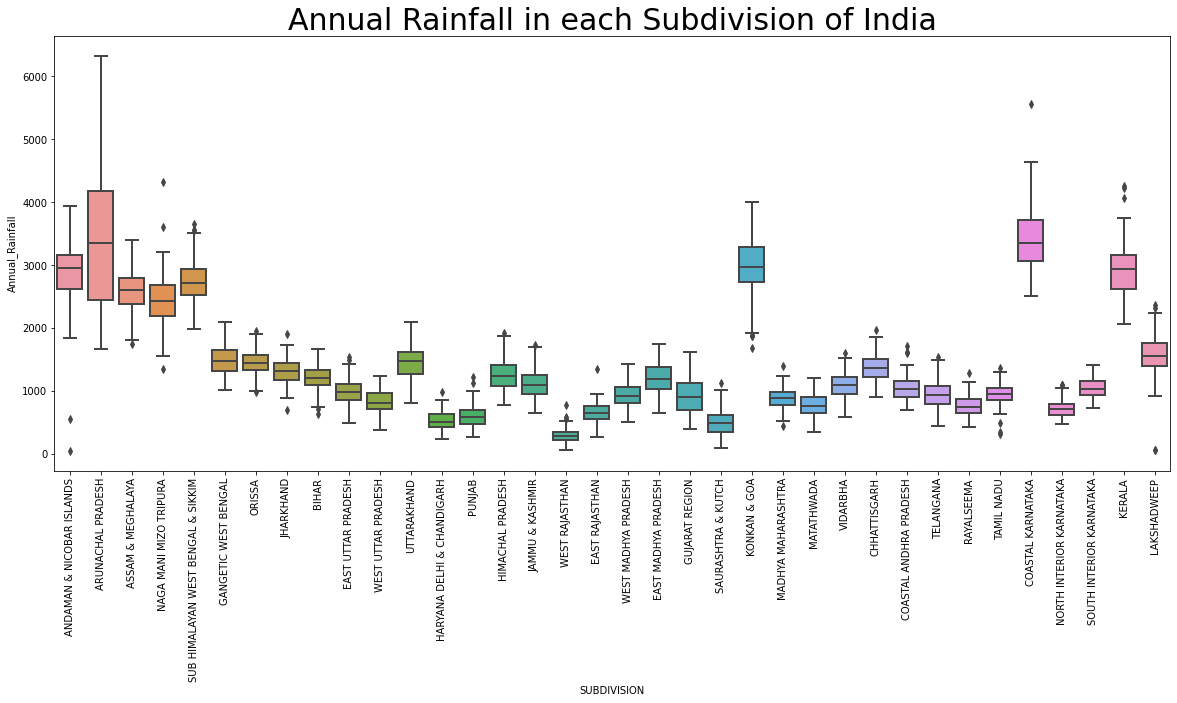

In [133]:
plt.rcParams['figure.figsize'] = (20,8)
sns.boxplot(x='SUBDIVISION',y='Annual_Rainfall', data=df, width=0.8, linewidth=2)
plt.title("Annual Rainfall in each Subdivision of India", fontsize=30)
plt.xticks(rotation=90)
plt.show()

## Month-wise Rainfall in India

In [134]:
df.columns

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'Annual_Rainfall', 'JAN_FEB',
       'JUL_AUG', 'NOV_DEC'],
      dtype='object')

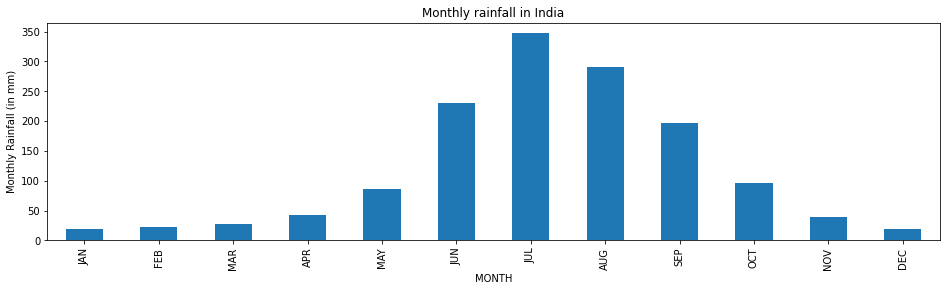

In [139]:
df[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC']].mean().plot.bar(figsize=(16,4))
plt.xlabel("MONTH")
plt.ylabel("Monthly Rainfall (in mm)")
plt.title("Monthly rainfall in India")
plt.show()